In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

np.random.seed(20171001)

In [3]:
mnist = input_data.read_data_sets("./data/", one_hot=True)

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz


In [4]:
with tf.name_scope('X'):
    x = tf.placeholder(tf.float32, [None, 784])
with tf.name_scope('W'):
    w = tf.Variable(tf.zeros([784, 10]))
with tf.name_scope('W0'):
    w0 = tf.Variable(tf.zeros([10]))
with tf.name_scope('P'):
    f = tf.matmul(x, w) + w0
    p = tf.nn.softmax(f)
with tf.name_scope('T'):
    t = tf.placeholder(tf.float32, [None, 10])

In [5]:
with tf.name_scope('Loss'):
    loss = -tf.reduce_sum(t * tf.log(p))
with tf.name_scope('Train'):
    train_step = tf.train.AdamOptimizer().minimize(loss)
with tf.name_scope('Acc'):
    correct_prediction =  tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [6]:
sess = tf.InteractiveSession()
# TensorBoardで追跡する変数を定義
with tf.name_scope('summary'):
    tf.summary.scalar('accuracy', accuracy)
    tf.summary.scalar('loss', loss)
    merged = tf.summary.merge_all()
    writer = tf.summary.FileWriter('./logs', sess.graph)

In [7]:
sess.run(tf.global_variables_initializer())
train_p = []
test_p = []
steps = []
i = 0
for _ in range(20000):
    batch_xs, batch_ts = mnist.train.next_batch(100)
    __, summary = sess.run([train_step, merged], feed_dict={x: batch_xs, t: batch_ts})
    
    if i % 1000 == 0:
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict = {x: batch_xs, t: batch_ts})
        train_p.append(acc_val)
        test_p.append(sess.run(accuracy, feed_dict={x: mnist.test.images, t: mnist.test.labels}))
        steps.append(i/1000)
        writer.add_summary(summary, _)
        print("step: %d, loss: %f, acc: %f" % (i, loss_val, acc_val))
    i += 1

step: 0, loss: 223.985809, acc: 0.660000
step: 1000, loss: 29.865761, acc: 0.940000
step: 2000, loss: 23.189945, acc: 0.940000
step: 3000, loss: 21.770950, acc: 0.930000
step: 4000, loss: 27.166721, acc: 0.930000
step: 5000, loss: 12.877014, acc: 0.960000
step: 6000, loss: 24.910049, acc: 0.940000
step: 7000, loss: 32.637718, acc: 0.920000
step: 8000, loss: 21.756659, acc: 0.910000
step: 9000, loss: 17.761646, acc: 0.950000
step: 10000, loss: 32.827740, acc: 0.940000
step: 11000, loss: 16.983624, acc: 0.960000
step: 12000, loss: 34.675030, acc: 0.910000
step: 13000, loss: 35.197178, acc: 0.910000
step: 14000, loss: 15.975695, acc: 0.970000
step: 15000, loss: 43.970688, acc: 0.930000
step: 16000, loss: 47.713184, acc: 0.890000
step: 17000, loss: 23.415329, acc: 0.930000
step: 18000, loss: 15.774624, acc: 0.940000
step: 19000, loss: 20.181698, acc: 0.950000


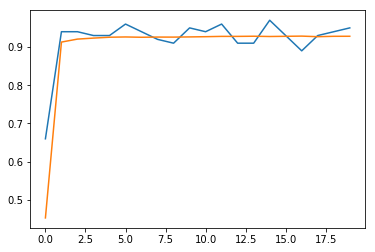

In [8]:
plt.plot(steps, train_p)
plt.plot(steps, test_p)

In [9]:
from PIL import Image
import os

0.2


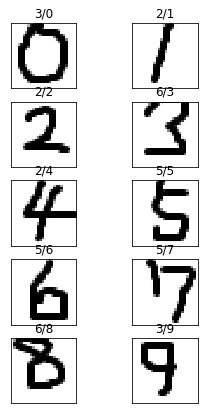

In [61]:
filenames = os.listdir('./sample/test_samples')
c = 1
fig = plt.figure(figsize=(4, 7))
label = np.array([0,1,2,3,4,5,6,7,8,9])
labels = []
imgs = []
for name in filenames:
    img = Image.open("./sample/test_samples/" + name).convert('L')
    img.thumbnail((28, 28))
    img = np.array(img, dtype=np.float32)
    img = 1-np.array(img / 255)
    img = img.reshape(1, 784)
    imgs.append(img)
    label = np.array([0,0,0,0,0,0,0,0,0,0])
    label[c-1] = 1
    labels.append(label)
    test_p = sess.run(p, feed_dict={x: img})
    subplot = fig.add_subplot(5, 2, c)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d/%d' % (np.argmax(test_p), np.argmax(labels[c-1])))
    subplot.imshow(img.reshape((28, 28)), vmin=0, vmax = 1, cmap=plt.cm.gray_r, interpolation="nearest")
    c += 1
print(sess.run(accuracy, feed_dict={x: np.array(imgs).reshape((10, 784)), t: labels}))

In [13]:
sess.run(accuracy, feed_dict={x: mnist.test.images, t: mnist.test.labels})

0.92729998